In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [45]:
# Load the labeled DataFrame for Decision Tree analysis
df_labeled = pd.read_csv("df_jobs_labeled.csv")

In [46]:
# Define the target variable
target = 'VacancyDuration'
X = df_labeled.drop(columns=[target])
y = pd.cut(df_labeled[target], bins=3, labels=['Short Vacancy', 'Medium Vacancy', 'Long Vacancy'])


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

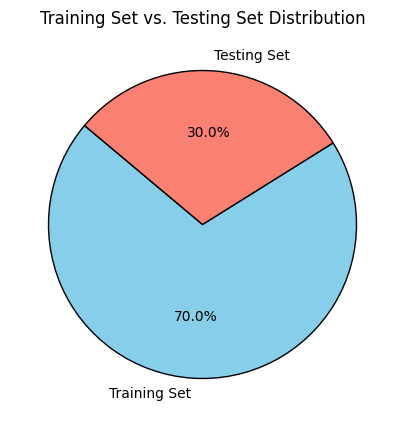

In [41]:
# Plot training and testing splits for illustration
fig, ax = plt.subplots(figsize=(10, 5))
labels = ['Training Set', 'Testing Set']
sizes = [len(X_train), len(X_test)]
colors = ['skyblue', 'salmon']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Training Set vs. Testing Set Distribution')
plt.savefig("training_testing_split.png")
plt.show()

In [48]:
# Display small samples of training and testing sets
print("Sample of Training Set (X_train):")
print(X_train.head())
print("Sample of Testing Set (X_test):")
print(X_test.head())
print("Sample of Training Labels (y_train):")
print(y_train.head())
print("Sample of Testing Labels (y_test):")
print(y_test.head())

Sample of Training Set (X_train):
      SalaryMin  SalaryMax  DisabilityMention
6106    45591.0   169378.0                  0
3063    47813.0   155403.0                  0
7427    31083.0   146757.0                  0
1860    41235.0   155403.0                  0
8049   112015.0   163252.0                  0
Sample of Testing Set (X_test):
      SalaryMin  SalaryMax  DisabilityMention
33      47813.0   155403.0                  0
5281    46081.0    59907.0                  0
4912    57442.0   155403.0                  0
3298    47813.0   155403.0                  0
4756    78255.0   108995.0                  0
Sample of Training Labels (y_train):
6106      Long Vacancy
3063      Long Vacancy
7427      Long Vacancy
1860      Long Vacancy
8049    Medium Vacancy
Name: VacancyDuration, dtype: category
Categories (3, object): ['Short Vacancy' < 'Medium Vacancy' < 'Long Vacancy']
Sample of Testing Labels (y_test):
33        Long Vacancy
5281     Short Vacancy
4912      Long Vacancy
3298     

In [49]:
# Shuffle columns to get different root nodes
different_root_random_state = 123  # Different random state to shuffle data for different root nodes

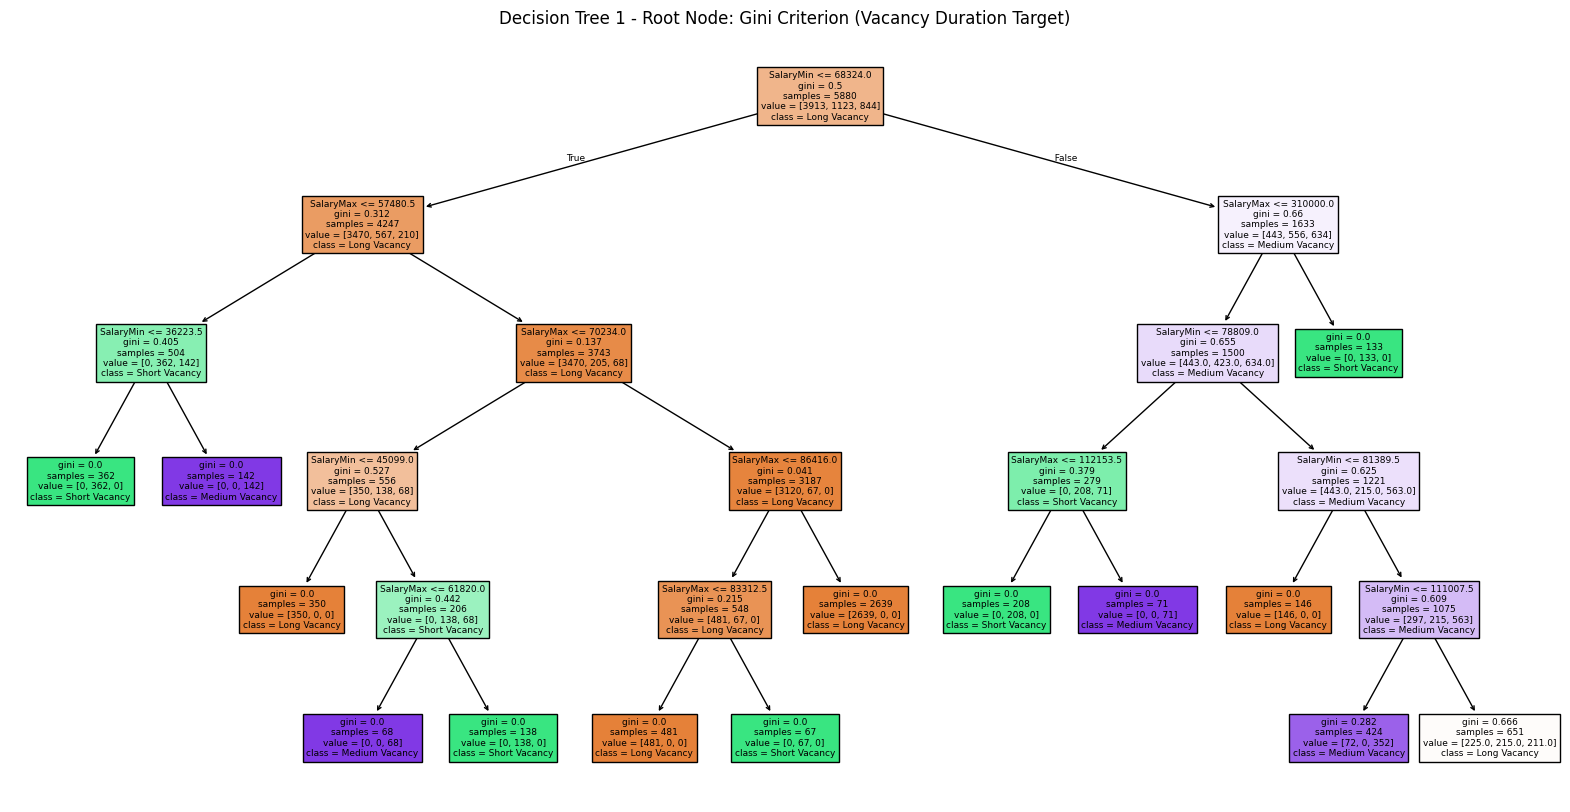

In [52]:
# Decision Tree 1 - Gini criterion with max depth of 5 (Original Order)
dt_classifier_1 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_classifier_1.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_1, filled=True, feature_names=X.columns, class_names=y.unique().astype(str).tolist())
plt.title("Decision Tree 1 - Root Node: Gini Criterion (Vacancy Duration Target)")
plt.savefig("decision_tree_plot_1.png")
plt.show()

In [64]:
# Evaluate Decision Tree Classifier
accuracy_1 = accuracy_score(y_test, dt_classifier_1.predict(X_test))
report_1 = classification_report(y_test, dt_classifier_1.predict(X_test))
print(f"Decision Tree 1 - Accuracy: {accuracy_1:.2f}")
print(report_1)
cm_1 = confusion_matrix(y_test, dt_classifier_1.predict(X_test))
print(f'Confusion Matrix: \n{cm_1}')

Decision Tree 1 - Accuracy: 0.92
                precision    recall  f1-score   support

  Long Vacancy       0.91      0.98      0.94      1687
Medium Vacancy       1.00      0.82      0.90       477
 Short Vacancy       0.91      0.75      0.82       356

      accuracy                           0.92      2520
     macro avg       0.94      0.85      0.89      2520
  weighted avg       0.92      0.92      0.92      2520

Confusion Matrix: 
[[1659    0   28]
 [  85  392    0]
 [  89    0  267]]


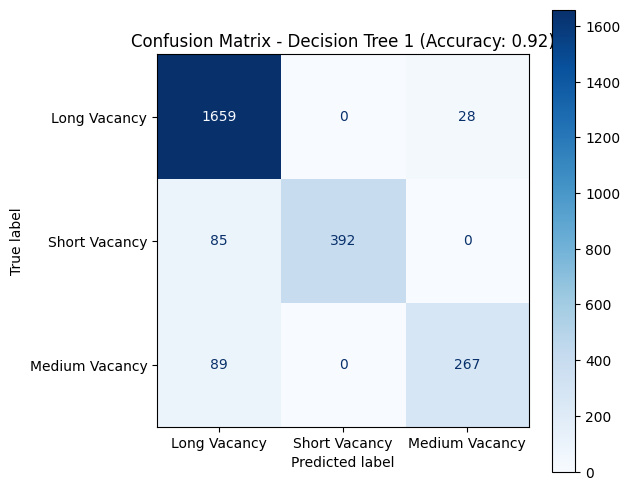

In [60]:
# Confusion Matrix for Decision Tree 1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay(cm_1, display_labels=y.unique().astype(str).tolist()).plot(ax=ax, cmap='Blues')
plt.title(f"Confusion Matrix - Decision Tree 1 (Accuracy: {accuracy_1:.2f})")
plt.savefig("confusion_matrix_dt_1.png")
plt.show()

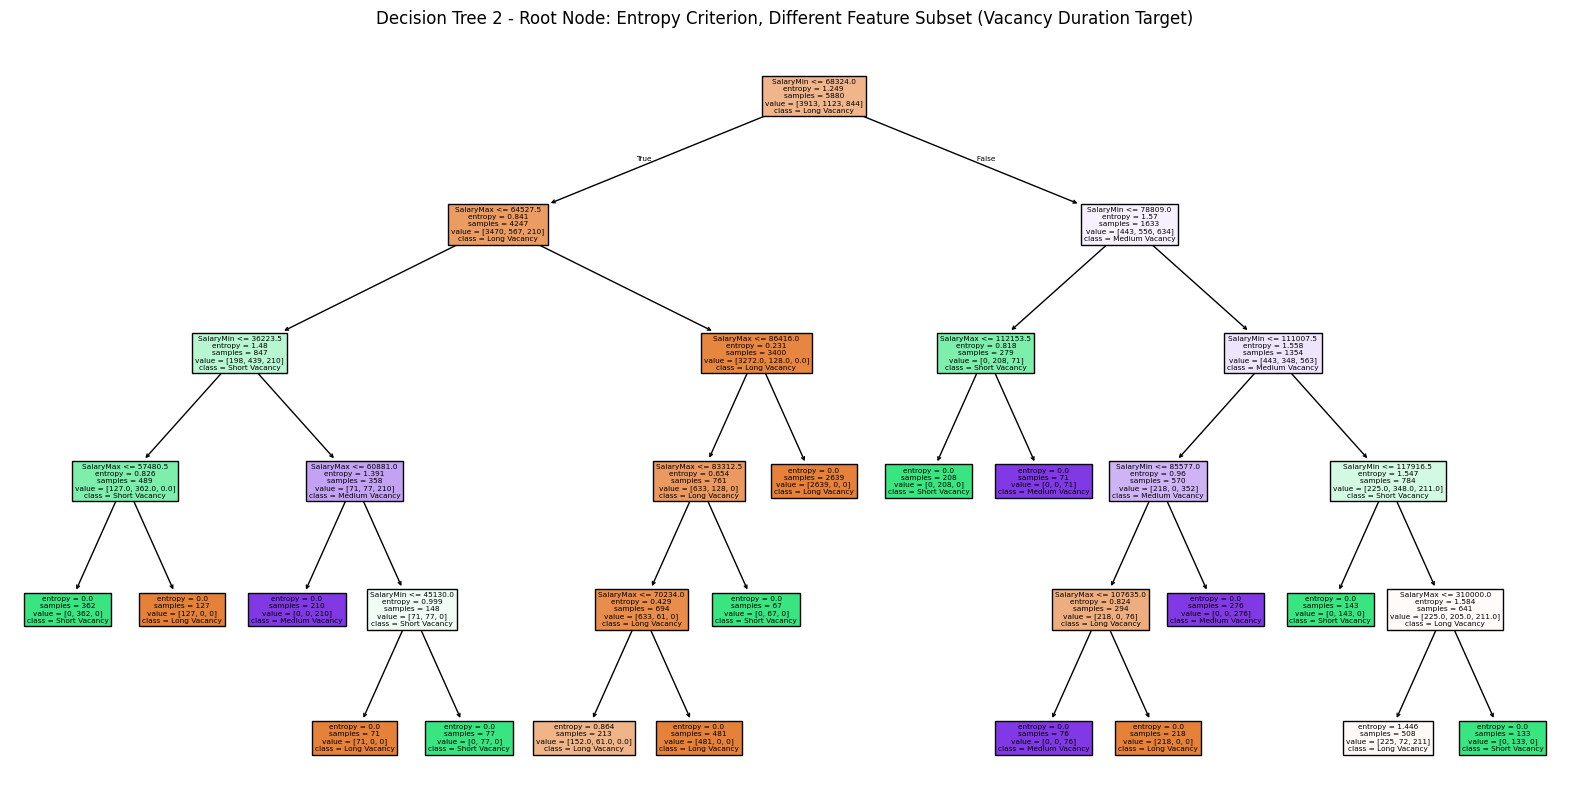

In [53]:
# Decision Tree 2 - Entropy criterion with max depth of 5 (Different Feature Subset)
feature_subset_2 = X_train.columns[:5]  # Use only the first 5 features
X_train_subset_2 = X_train[feature_subset_2]
X_test_subset_2 = X_test[feature_subset_2]

dt_classifier_2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_classifier_2.fit(X_train_subset_2, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_2, filled=True, feature_names=feature_subset_2, class_names=y.unique().astype(str).tolist())
plt.title("Decision Tree 2 - Root Node: Entropy Criterion, Different Feature Subset (Vacancy Duration Target)")
plt.savefig("decision_tree_plot_2.png")
plt.show()

In [67]:
# Evaluate Decision Tree Classifier
accuracy_2 = accuracy_score(y_test, dt_classifier_2.predict(X_test_subset_2))
report_2 = classification_report(y_test, dt_classifier_2.predict(X_test_subset_2))
print(f"Decision Tree 2 - Accuracy: {accuracy_2:.2f}")
print(report_2)
cm_2 = confusion_matrix(y_test, dt_classifier_2.predict(X_test_subset_2))
print(f'Confusion Matrix: \n{cm_2}')

Decision Tree 2 - Accuracy: 0.94
                precision    recall  f1-score   support

  Long Vacancy       0.92      1.00      0.96      1687
Medium Vacancy       1.00      0.86      0.92       477
 Short Vacancy       1.00      0.75      0.86       356

      accuracy                           0.94      2520
     macro avg       0.97      0.87      0.91      2520
  weighted avg       0.94      0.94      0.94      2520

Confusion Matrix: 
[[1687    0    0]
 [  67  410    0]
 [  89    0  267]]


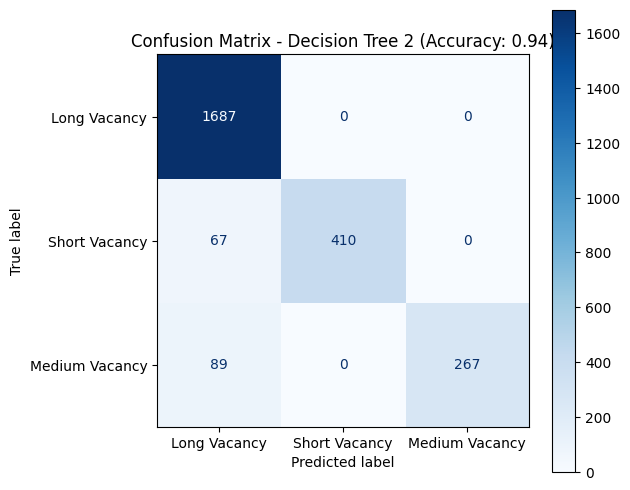

In [66]:
# Confusion Matrix for Decision Tree 2
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay(cm_2, display_labels=y.unique().astype(str).tolist()).plot(ax=ax, cmap='Blues')
plt.title(f"Confusion Matrix - Decision Tree 2 (Accuracy: {accuracy_2:.2f})")
plt.savefig("confusion_matrix_dt_2.png")
plt.show()

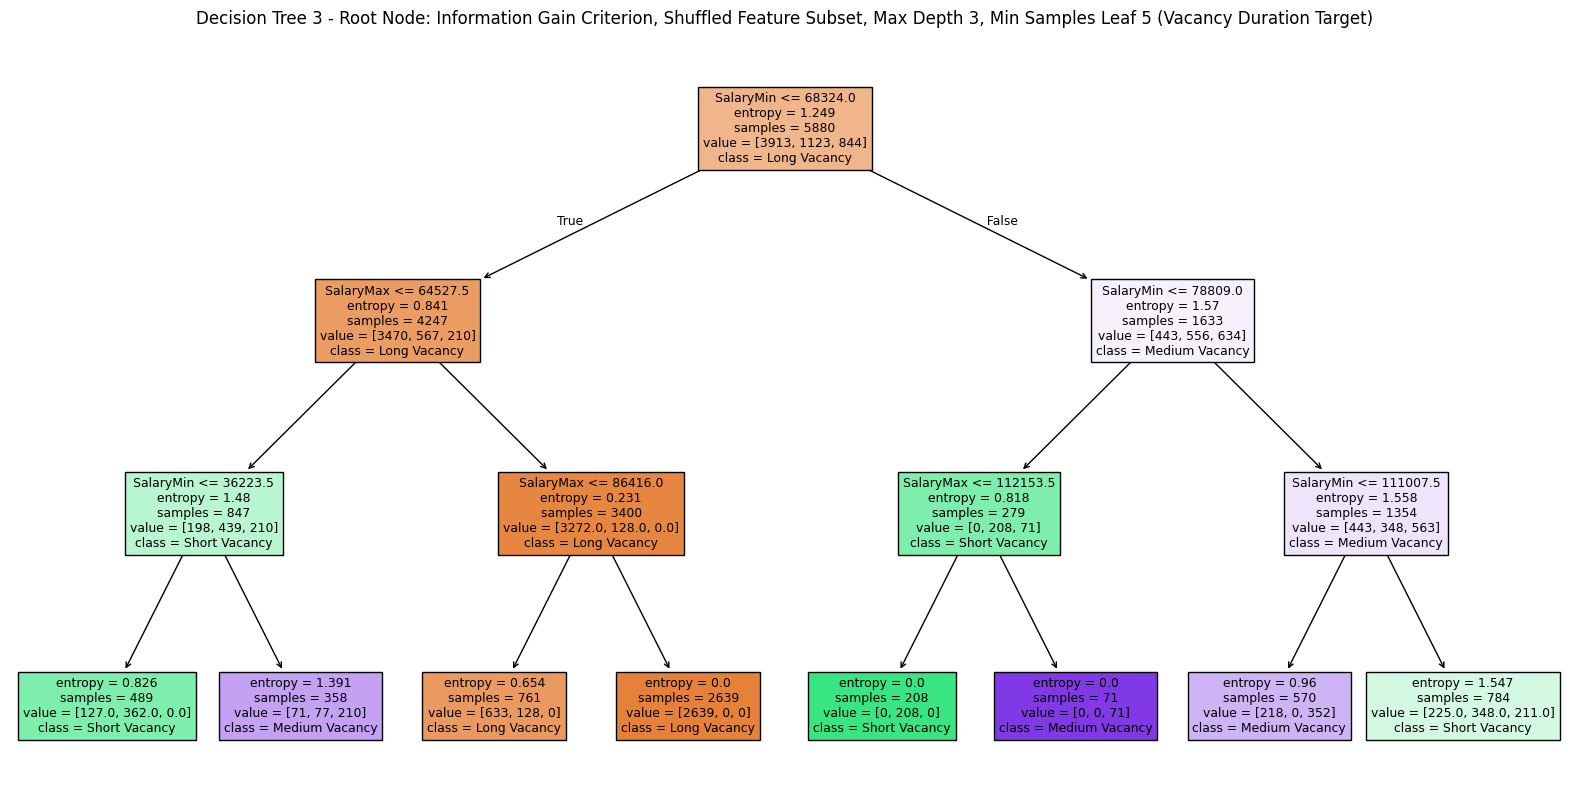

In [54]:
# Decision Tree 3 - Information Gain criterion with max depth of 3 (Different Feature Subset and Parameters)
np.random.seed(99)
shuffled_features_3 = np.random.permutation(X_train.columns)  # Shuffle the features
feature_subset_3 = shuffled_features_3[:7]  # Use 7 randomly shuffled features
X_train_subset_3 = X_train[feature_subset_3]
X_test_subset_3 = X_test[feature_subset_3]

dt_classifier_3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=99, min_samples_split=10, min_samples_leaf=5)
dt_classifier_3.fit(X_train_subset_3, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_3, filled=True, feature_names=feature_subset_3, class_names=y.unique().astype(str).tolist())
plt.title("Decision Tree 3 - Root Node: Information Gain Criterion, Shuffled Feature Subset, Max Depth 3, Min Samples Leaf 5 (Vacancy Duration Target)")
plt.savefig("decision_tree_plot_3.png")
plt.show()


In [68]:
# Evaluate Decision Tree Classifier
accuracy_3 = accuracy_score(y_test, dt_classifier_3.predict(X_test_subset_3))
report_3 = classification_report(y_test, dt_classifier_3.predict(X_test_subset_3))
print(f"Decision Tree 3 - Accuracy: {accuracy_3:.2f}")
print(report_3)
cm_3 = confusion_matrix(y_test, dt_classifier_3.predict(X_test_subset_3))
print(f'Confusion Matrix: \n{cm_3}')

Decision Tree 3 - Accuracy: 0.82
                precision    recall  f1-score   support

  Long Vacancy       0.95      0.85      0.90      1687
Medium Vacancy       0.62      0.80      0.70       477
 Short Vacancy       0.67      0.75      0.71       356

      accuracy                           0.82      2520
     macro avg       0.74      0.80      0.77      2520
  weighted avg       0.85      0.82      0.83      2520

Confusion Matrix: 
[[1428  148  111]
 [  72  382   23]
 [   0   89  267]]


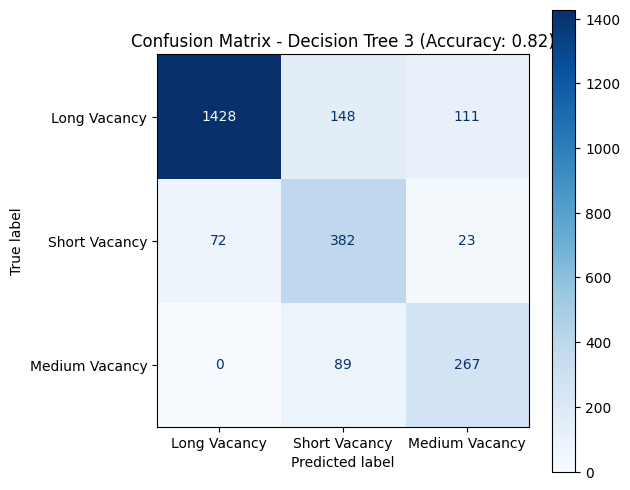

In [69]:
# Confusion Matrix for Decision Tree 3
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay(cm_3, display_labels=y.unique().astype(str).tolist()).plot(ax=ax, cmap='Blues')
plt.title(f"Confusion Matrix - Decision Tree 3 (Accuracy: {accuracy_3:.2f})")
plt.savefig("confusion_matrix_dt_3.png")
plt.show()